In [1]:
import os
import re

from sodapy import Socrata

from tqdm import tqdm
import time

import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
from sodapy import Socrata
%matplotlib inline

import scipy.stats as stats
import math

pd.set_option('display.max_rows', 1000)

This jupyter notebook is where I cleaned my property sales data and merged it with my noise data for each year. Below is what I did for 2020. I did this separately for each year following the same process. 

Start with Sales data

Import each xlsx sheet for each of the 5 boroughs and concat.

In [2]:
df1 = pd.read_excel('/Users/ksalmon/Desktop/GA/DSI20-lessons/projects/project-capstone/2020_staten_island.xlsx')

In [3]:
df2 = pd.read_excel('/Users/ksalmon/Desktop/GA/DSI20-lessons/projects/project-capstone/2020_bronx.xlsx')

In [4]:
df3 = pd.read_excel('/Users/ksalmon/Desktop/GA/DSI20-lessons/projects/project-capstone/2020_brooklyn.xlsx')

In [5]:
df4 = pd.read_excel('/Users/ksalmon/Desktop/GA/DSI20-lessons/projects/project-capstone/2020_queens.xlsx')

In [6]:
df5 = pd.read_excel('/Users/ksalmon/Desktop/GA/DSI20-lessons/projects/project-capstone/2020_manhattan.xlsx')

In [7]:
dfs = [df1, df2, df3, df4, df5]

In [8]:
df2.head(8)

,BRONX ANNUAL SALES FOR CALENDAR YEAR 2020,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,All Sales From January 2020- December 2020. Pr...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"For sales prior to the Final, Neighborhood Nam...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Sales after the Final Roll, Neighborhood Name ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Building Class Category is based on Building C...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Note: Condominium and cooperative sales are on...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL\nUNITS,COMMERCIAL\nUNITS,TOTAL \nUNITS,LAND \nSQUARE FEET,GROSS \nSQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS\nAT TIME OF SALE,SALE PRICE,SALE DATE
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3029,36,NaN,A5,418 EAST 180 STREET,NaN,...,1,0,1,1568,1526,1899,1,A5,0,2020-07-09 00:00:00


Set column headers for each DF and combine into one DF.

In [9]:

def get_heads(l):
    appended_data = []
    for x in l:
        x.columns = x.iloc[5]
        x = x[7:]
        appended_data.append(x)
    appended_data = pd.concat(appended_data)
    return appended_data

    

In [10]:
all_dfs = get_heads(dfs)

In [11]:
all_dfs.to_csv('/Users/ksalmon/Desktop/GA/DSI20-lessons/projects/project-capstone/sales2020_raw.csv')

In [12]:
all_dfs.columns

Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL\nUNITS', 'COMMERCIAL\nUNITS', 'TOTAL \nUNITS',
       'LAND \nSQUARE FEET', 'GROSS \nSQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS\nAT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'],
      dtype='object', name=5)

In [13]:
df = all_dfs.copy()

Now that I have 1 df, drop unnecessary cols and clean headers

In [14]:
# Rename cols, drop extraneous cols

def init_clean(x):
    x.columns = x.columns.str.replace('\n', '', regex=True)
    x.drop(columns=['BOROUGH', 'BLOCK','LOT', 'EASE-MENT', 'APARTMENT NUMBER','LAND SQUARE FEET',
       'GROSS SQUARE FEET', 'BUILDING CLASSAT TIME OF SALE',
                'YEAR BUILT', 'SALE DATE', 'TOTAL UNITS'], inplace=True)
    return x
    
    
    

In [15]:
df = init_clean(df)

In [16]:
df.head(10)

5,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIALUNITS,COMMERCIALUNITS,TAX CLASS AT TIME OF SALE,SALE PRICE
7,ANNADALE,01 ONE FAMILY DWELLINGS,1,A5,4726 AMBOY ROAD,10312,1,0,1,0
8,ANNADALE,01 ONE FAMILY DWELLINGS,1,A1,119 LENZIE STREET,10312,1,0,1,315000
9,ANNADALE,01 ONE FAMILY DWELLINGS,1,A1,118 ELMBANK STREET,10312,1,0,1,450000
10,ANNADALE,01 ONE FAMILY DWELLINGS,1,A1,7 SANDGAP STREET,10312,1,0,1,525000
11,ANNADALE,01 ONE FAMILY DWELLINGS,1,A5,91 EAGAN AVENUE,10312,1,0,1,480000
12,ANNADALE,01 ONE FAMILY DWELLINGS,1,A1,7 SEGUINE PLACE,10312,1,0,1,720000
13,ANNADALE,01 ONE FAMILY DWELLINGS,1,A5,44 MAY PLACE,10312,1,0,1,0
14,ANNADALE,01 ONE FAMILY DWELLINGS,1,A5,22 MAY PLACE,10312,1,0,1,0
15,ANNADALE,01 ONE FAMILY DWELLINGS,1,A5,60 SEGUINE PLACE,10312,1,0,1,429000
16,ANNADALE,01 ONE FAMILY DWELLINGS,1,A5,15 EAGAN AVENUE,10312,1,0,1,550000


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68684 entries, 7 to 12886
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   NEIGHBORHOOD               68684 non-null  object
 1   BUILDING CLASS CATEGORY    68684 non-null  object
 2   TAX CLASS AT PRESENT       68644 non-null  object
 3   BUILDING CLASS AT PRESENT  68644 non-null  object
 4   ADDRESS                    68684 non-null  object
 5   ZIP CODE                   68673 non-null  object
 6   RESIDENTIALUNITS           55809 non-null  object
 7   COMMERCIALUNITS            55809 non-null  object
 8   TAX CLASS AT TIME OF SALE  68684 non-null  object
 9   SALE PRICE                 68684 non-null  object
dtypes: object(10)
memory usage: 5.8+ MB


In [18]:
#  Drop $0 sale prices
df['SALE PRICE'] = df['SALE PRICE'].astype(int)

In [19]:
df = df[df['SALE PRICE'] != 0]

In [20]:
df['TAX CLASS AT PRESENT'].unique()
# Drop letters from numbers in order to convert to Ints and convert NaNs to 1

array(['1', '1B', '4', '1A', '2', '1C', '2A', '2B', '2C', '1D', nan],
      dtype=object)

In [21]:
mask = df['TAX CLASS AT PRESENT'].isna()

In [22]:
df = df[~mask]

In [23]:
df['TAX CLASS AT PRESENT'].value_counts()

1     19555
2     18433
4      2936
2C     1554
1A      863
2A      703
1B      518
2B      249
1C      115
1D      108
Name: TAX CLASS AT PRESENT, dtype: int64

In [24]:
# Drop letters from class
df['TAX CLASS AT PRESENT'] = df['TAX CLASS AT PRESENT'].str.replace(r"[a-zA-Z]",'', regex=True)

In [25]:
# convert to int and drop rows with 4 (class 4 isn't residential)
df['TAX CLASS AT PRESENT'] = df['TAX CLASS AT PRESENT'].astype(int)

In [26]:
# Tax Classes 1 and 2 are residental properties, drop class 4 - these aren't residential
df = df[df['TAX CLASS AT PRESENT'] != 4]

In [27]:
df['TAX CLASS AT TIME OF SALE'].unique()

array(['1', '2', '4'], dtype=object)

In [28]:
df['TAX CLASS AT TIME OF SALE'] = df['TAX CLASS AT TIME OF SALE'].astype(int)

In [29]:
# Tax Classes 1 and 2 are residental properties, drop 4
df = df[df['TAX CLASS AT TIME OF SALE'] != 4]

In [30]:
# Drop more columns
df.drop(columns=['TAX CLASS AT PRESENT', 'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT PRESENT'], axis=1, inplace=True)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42077 entries, 8 to 12877
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   NEIGHBORHOOD             42077 non-null  object
 1   BUILDING CLASS CATEGORY  42077 non-null  object
 2   ADDRESS                  42077 non-null  object
 3   ZIP CODE                 42077 non-null  object
 4   RESIDENTIALUNITS         31060 non-null  object
 5   COMMERCIALUNITS          31060 non-null  object
 6   SALE PRICE               42077 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 2.6+ MB


In [32]:
df.head(10)

5,NEIGHBORHOOD,BUILDING CLASS CATEGORY,ADDRESS,ZIP CODE,RESIDENTIALUNITS,COMMERCIALUNITS,SALE PRICE
8,ANNADALE,01 ONE FAMILY DWELLINGS,119 LENZIE STREET,10312,1,0,315000
9,ANNADALE,01 ONE FAMILY DWELLINGS,118 ELMBANK STREET,10312,1,0,450000
10,ANNADALE,01 ONE FAMILY DWELLINGS,7 SANDGAP STREET,10312,1,0,525000
11,ANNADALE,01 ONE FAMILY DWELLINGS,91 EAGAN AVENUE,10312,1,0,480000
12,ANNADALE,01 ONE FAMILY DWELLINGS,7 SEGUINE PLACE,10312,1,0,720000
15,ANNADALE,01 ONE FAMILY DWELLINGS,60 SEGUINE PLACE,10312,1,0,429000
16,ANNADALE,01 ONE FAMILY DWELLINGS,15 EAGAN AVENUE,10312,1,0,550000
17,ANNADALE,01 ONE FAMILY DWELLINGS,70 SEGUINE PLACE,10312,1,0,455500
18,ANNADALE,01 ONE FAMILY DWELLINGS,44 LUCY LOOP,10312,1,0,410670
19,ANNADALE,01 ONE FAMILY DWELLINGS,93 LORRAIN AVENUE,10312,1,0,520000


In [33]:
# The units with NaN for 'Residential Units' are single unit properties

df.iloc[:,4] = df.iloc[:,4].replace(np.nan, 1)

In [34]:
# Rows with COMMERCIAL UNITS for NaN are the ones that are single unit residental properties
df.iloc[:,5] = df.iloc[:,5].replace(np.nan, 0)

In [35]:
# Make unit cols integers
cols = [4, 5]
for x in cols:
    df.iloc[:,x] = df.iloc[:,x].astype(int)

In [36]:
# Drop sales with commercial units greater than 0
mask = df['COMMERCIALUNITS'] > 0

In [37]:
df = df[~mask]

In [38]:
# Fix Res Unit count where it was a single unit sale but the unit count is greater than 1. 
# These are incorrectly categorized

In [39]:
mask = (df.iloc[:,4] > 1) & (df.iloc[:,2].str.contains(","))

In [40]:
comma = df[mask] 

In [41]:
# Units with commas, means there's a unit number in address so the sale was for a single unit. 
# In these cases where there is a number greater than 1 listed, then the sale is for a single unit and Res Unit needs 
# to be changed
comma.loc[comma['RESIDENTIALUNITS'] > 1, 'RESIDENTIALUNITS'] = 1

/Users/ksalmon/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [42]:
no_comma = df[~mask]

In [43]:
comma.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 208 entries, 1218 to 12623
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   NEIGHBORHOOD             208 non-null    object
 1   BUILDING CLASS CATEGORY  208 non-null    object
 2   ADDRESS                  208 non-null    object
 3   ZIP CODE                 208 non-null    object
 4   RESIDENTIALUNITS         208 non-null    int64 
 5   COMMERCIALUNITS          208 non-null    int64 
 6   SALE PRICE               208 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 13.0+ KB


In [44]:
no_comma.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41021 entries, 8 to 12877
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   NEIGHBORHOOD             41021 non-null  object
 1   BUILDING CLASS CATEGORY  41021 non-null  object
 2   ADDRESS                  41021 non-null  object
 3   ZIP CODE                 41021 non-null  object
 4   RESIDENTIALUNITS         41021 non-null  int64 
 5   COMMERCIALUNITS          41021 non-null  int64 
 6   SALE PRICE               41021 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 2.5+ MB


PPU = price per unit

If 1 unit, then the sale price equals the price per unit. If multiple units, then divide sale price by number of residential units.

In [45]:
comma['ppu'] = comma['SALE PRICE']

<ipython-input-45-70436111192d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comma['ppu'] = comma['SALE PRICE']


In [46]:
no_comma['ppu'] = no_comma['SALE PRICE'] / no_comma['RESIDENTIALUNITS']

<ipython-input-46-da4ad689350b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_comma['ppu'] = no_comma['SALE PRICE'] / no_comma['RESIDENTIALUNITS']


In [47]:
frames = [comma, no_comma]

r = pd.concat(frames)

In [48]:
r.drop_duplicates(inplace=True)

In [49]:
# Class 05 is for vacant lots some of which have now had houses built on them
# Drop class 05 out of other classes in "BUILDING CLASS CATEGORY" where address contains N/A. 
# Also drop class 05 out of other classes in "BUILDING CLASS CATEGORY" where res units is 0

In [50]:
r.head(10)

5,NEIGHBORHOOD,BUILDING CLASS CATEGORY,ADDRESS,ZIP CODE,RESIDENTIALUNITS,COMMERCIALUNITS,SALE PRICE,ppu
1218,CONCORD,02 TWO FAMILY DWELLINGS,"664 RICHMOND ROAD, 4",10304,1,0,640000,640000.0
54,BATHGATE,11 SPECIAL CONDO BILLING LOTS,"4215 PARK AVENUE, AFFOR",10457,1,0,10,10.0
1890,EAST TREMONT,11 SPECIAL CONDO BILLING LOTS,"1926 CROTONA PARKWAY, RU",10460,1,0,5191770,5191770.0
2104,HIGHBRIDGE/MORRIS HEIGHTS,08 RENTALS - ELEVATOR APARTMENTS,"1200 WOODYCREST AVENUE, 1-H",10452,1,0,30000,30000.0
2616,MELROSE/CONCOURSE,08 RENTALS - ELEVATOR APARTMENTS,"1259 GRANT AVENUE, 10D",10456,1,0,125000,125000.0
3175,MORRISANIA/LONGWOOD,07 RENTALS - WALKUP APARTMENTS,"847 FOX STREET, 1",10459,1,0,42670,42670.0
3176,MORRISANIA/LONGWOOD,07 RENTALS - WALKUP APARTMENTS,"847 FOX STREET, 2",10459,1,0,42670,42670.0
3177,MORRISANIA/LONGWOOD,07 RENTALS - WALKUP APARTMENTS,"847 FOX STREET, 3",10459,1,0,42670,42670.0
3178,MORRISANIA/LONGWOOD,07 RENTALS - WALKUP APARTMENTS,"847 FOX STREET, 4",10459,1,0,42670,42670.0
3179,MORRISANIA/LONGWOOD,07 RENTALS - WALKUP APARTMENTS,"847 FOX STREET, 5",10459,1,0,42670,42670.0


In [52]:
# No specific house numbers in this subset, so drop them.
mask = r["BUILDING CLASS CATEGORY"].str.contains("05") & r["ADDRESS"].str.contains("N/A")

In [53]:
r = r[~mask]

In [54]:
# These are vacant lots
mask2 = (r["BUILDING CLASS CATEGORY"].str.contains("05")) & (r['RESIDENTIALUNITS'] == 0)

In [55]:
r = r[~mask2]

In [56]:
# 06 = 06 TAX CLASS 1 - OTHER

In [57]:
# No house numbers in these addresses
mask3 = r["BUILDING CLASS CATEGORY"].str.contains("06 TAX CLASS 1 - OTHER") & r["ADDRESS"].str.contains("N/A")

In [58]:
r = r[~mask3]

In [59]:
r.loc[r['RESIDENTIALUNITS'] == 0, 'RESIDENTIALUNITS'] = 1

In [60]:
mask1 = r['RESIDENTIALUNITS'] == 1

In [61]:
one_unit = r[mask1]

In [62]:
multi_unit = r[~mask1]

In [63]:
one_unit['ppu'] = one_unit['SALE PRICE']

<ipython-input-63-ec16912a3cd6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one_unit['ppu'] = one_unit['SALE PRICE']


In [64]:
dfs = [one_unit, multi_unit]

In [65]:
final = pd.concat(dfs)

In [66]:
final['SALE PRICE'].median()

685000.0

<AxesSubplot:xlabel='SALE PRICE'>

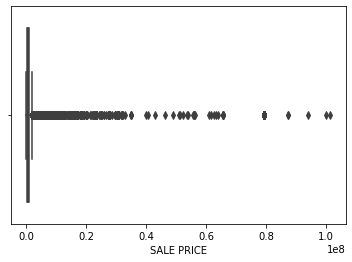

In [67]:
sns.boxplot(x=final['SALE PRICE'])

<AxesSubplot:ylabel='ppu'>

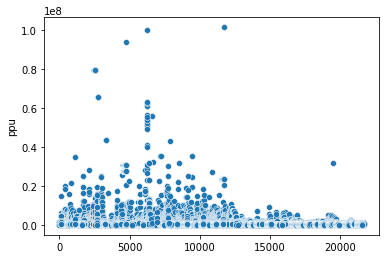

In [68]:
sns.scatterplot(data=final['ppu'])

<AxesSubplot:xlabel='ppu'>

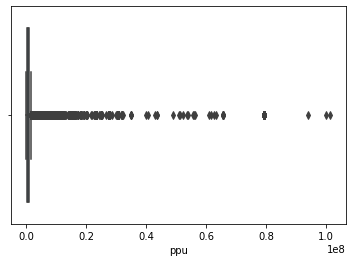

In [69]:
sns.boxplot(x=final['ppu'])

In [ ]:
# Make column for year and map a 'zipyear' column - this will be the column to merge on.

In [70]:
final['year'] = '2020'

In [71]:
final['zipyear'] = final['ZIP CODE'].astype(str) + final['year'].astype(str)

In [72]:
final.reset_index(inplace=True)

In [73]:
final.to_csv('/Users/ksalmon/Desktop/GA/DSI20-lessons/projects/project-capstone/final_sales2020.csv')

In [74]:
data=final.groupby('zipyear', as_index=False)['ppu'].mean()

In [75]:
data.describe()

5,ppu
count,1.820000e+02
mean,1.047987e+06
std,1.531103e+06
min,2.261435e+05
25%,4.607006e+05
50%,5.645313e+05
75%,1.008851e+06
max,1.335516e+07


<AxesSubplot:xlabel='zipyear', ylabel='ppu'>

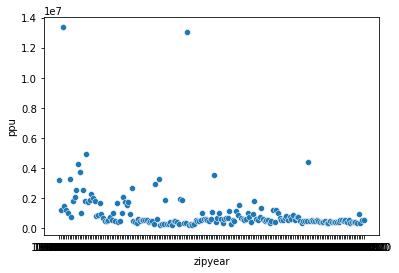

In [76]:
sns.scatterplot(data=data, x='zipyear', y='ppu')

<AxesSubplot:xlabel='ppu', ylabel='Count'>

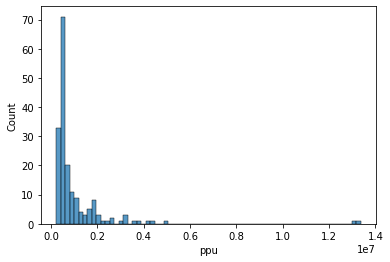

In [77]:
sns.histplot(data=data, x='ppu')

Import Noise data

In [78]:
# client = Socrata(socrata_domain, socrata_token, timeout=1200)
# print("DOmain: {domain:}\Session: {session:}\nURI Prefix: {uri_prefix:}".format(**client.__dict__))

In [80]:
# # Example authenticated client (needed for non-public datasets):
client = Socrata('data.cityofnewyork.us',
                 'Jw65edb1uRRISIi9kxEkA4KMS',
                 username="salmon.katie@gmail.com",
                 password="gp4FafBvdYgQ*x",
                timeout=1200)

# All results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("365v-6chq", limit=801000)

In [ ]:
results_df = pd.DataFrame.from_records(results)

I briefly looked into differences in noise counts over the months and weeks.

In [ ]:
# results_df['year'] = results_df.date.dt.year
# results_df['month'] = results_df.date.dt.month

In [ ]:
# results_df['week'] = results_df.date.dt.week

In [ ]:
# x = pd.read_csv('/Users/ksalmon/Desktop/GA/DSI20-lessons/projects/project-capstone/Sales_Zip/Noise_2019.csv')

In [ ]:
# x['date'] = pd.to_datetime(x['Created Date'])

In [ ]:
# x['year'] = x.date.dt.year
# x['month'] = x.date.dt.month

In [ ]:
results_df.head()

In [ ]:
n = results_df.copy()

In [ ]:
# Drop cols 
drop_cols = ['created_date', 'location', 'city',
       'cross_street_2', 'closed_date', 'park_facility_name',
       'intersection_street_1', 'landmark', 'agency_name', 'latitude',
       'x_coordinate_state_plane', 'resolution_description',
       'incident_address', 'location_type', 'cross_street_1',
       'community_board', 'park_borough', 'borough', 'street_name',
       'longitude', 'status','y_coordinate_state_plane', 'resolution_action_updated_date',
       'intersection_street_2', 'address_type', 'facility_type']

In [ ]:
n.drop(columns=drop_cols, inplace=True)

In [ ]:
# Why does 2020 have double the amount of complaints than any other years?! 
# Because of the huge amount of protests in the summer of 2020
n.info()

In [ ]:
# Drop rows with NaNs in Zip
n = n[n['incident_zip'].notna()]

In [ ]:
n['year'] = '2020'

In [ ]:
n['zipyear'] = n['incident_zip'].astype(str) + n['year'].astype(str)

In [ ]:
n.head()

In [ ]:
n.drop_duplicates(inplace=True)

In [ ]:
n.drop(columns=['incident_zip', 'unique_key'], inplace=True)

In [ ]:
n.to_csv('/Users/ksalmon/Desktop/GA/DSI20-lessons/projects/project-capstone/noise2020_cleaned.csv')

Merging Noise and Sales

In [ ]:
merge2020 = pd.merge(n, data, how='left')

In [ ]:

merge2020

In [ ]:
merge2020.to_csv('/Users/ksalmon/Desktop/GA/DSI20-lessons/projects/project-capstone/merge2020.csv')